# (Convolution Nueral Network) CNN

<img src="https://miro.medium.com/v2/resize:fit:1200/1*4OUonEDfZwCfR4Y-G-h1fw.jpeg" alt="A road surrounded by autumn trees" width="600">

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# print shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

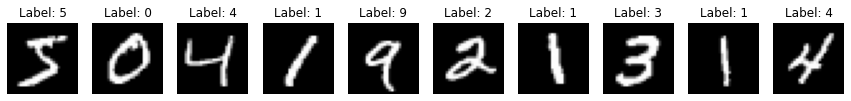

In [4]:
# Function to plot some images from the dataset
def plot_samples(x, y, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

# Plot some samples from the training set
plot_samples(x_train, y_train, num_samples=10)

In [5]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Processing data to make it compitable with CNN Model

In [8]:
x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test]*3)
x_train.shape,x_test.shape

((60000, 28, 84), (10000, 28, 84))

In [9]:
# Reshape images as per the tensor format required by tensorflow
x_train = x_train.reshape(-1, 28,28,3)
x_test= x_test.reshape (-1,28,28,3)
x_train.shape,x_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

## Model Build

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model(input_shape=(28, 28, 3)):
    model = models.Sequential()
    
    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=1, padding='valid', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second convolutional layer
    model.add(layers.Conv2D(16, (3, 3), activation='relu', strides=1,padding='valid'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    
    # Flatten the output of the convolutional layers
    model.add(layers.Flatten())
    
    # Fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    
    # Output layer with softmax activation for classification
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Create the model
model = create_cnn_model()

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 64)                2

In [13]:
# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2212 - accuracy: 0.9318 - val_loss: 0.0766 - val_accuracy: 0.9766
Epoch 2/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0724 - val_accuracy: 0.9797
Epoch 3/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0554 - val_accuracy: 0.9837
Epoch 4/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0414 - accuracy: 0.9868 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 5/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0655 - val_accuracy: 0.9818


In [15]:
print("Boom! You've leveled up! Now you're not just training ANNs, you're diving into Convoltuion neural network with image data!")

Boom! You've leveled up! Now you're not just training ANNs, you're diving into Convoltuion neural network with image data!


In [16]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0535 - accuracy: 0.9826
Test accuracy: 0.9825999736785889


In [18]:
# Predict the classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [19]:
print("Precision_Score: ",precision_score(y_test, y_pred_classes,average='weighted'))
print("Recall_Score: ",recall_score(y_test, y_pred_classes,average='weighted'))
print("F1_Score: ",f1_score(y_test, y_pred_classes,average='weighted'))

Precision_Score:  0.9828697137689558
Recall_Score:  0.9826
F1_Score:  0.9826192762110275


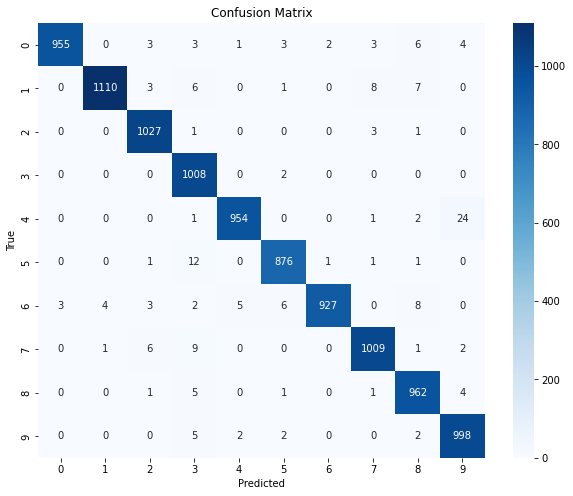

In [21]:
import seaborn as sns
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Transfer Learning Model VGG-16

There several transfer learning
Resent50

In [25]:
# Resize the images 48*48 as required by VGG16 
# you can use any dimesion 31x31 to 224x224

from keras.preprocessing.image import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

### Define VGG16 Model

In [24]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D) 

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Create a custom input layer with the desired shape
input_layer = layers.Input(shape=(48,48,3))

# Load the VGG16 model with pre-trained ImageNet weights, 
# using the custom input tensor and excluding the top classification layer
model_vgg16 = VGG16(weights='imagenet', input_tensor=input_layer, include_top=False)

# Make the VGG16 layers non-trainable
for layer in model_vgg16.layers:
    layer.trainable = False

# Get the output of the last layer of the VGG16 model
last_layer = model_vgg16.output

# Add a flatten layer
flatten = layers.Flatten()(last_layer)

# Add dense layers
dense1 = layers.Dense(64, activation='relu')(flatten)
dense2 = layers.Dense(32, activation='relu')(dense1)

# Add the final output layer with softmax activation for classification
output_layer = layers.Dense(10, activation='softmax')(dense2)

# Create the new model with the custom input and output layers
model = models.Model(inputs=input_layer, outputs=output_layer)

# Summarize the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [40]:
# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [42]:
# Train the model
history = model.fit(xtrain, y_train, epochs=5, batch_size=32, validation_split=0.2)